## Pre-Processing of the Data

### Dataset : Pima Indians Diabetes Database

This dataset is taken originally from the National Institute of Diabetes, Digestive and Kidney Diseases.

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative. 

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

### Loading the dataset

In [2]:
location=("C:\\Users\\krishna meghana\\Downloads\\diabetes.csv")
data = pd.read_csv(location)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("The shape of the data is ",data.shape)

The shape of the data is  (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes dataset contains 768 rows and 9 features including the target variable in which all are numeric in nature. No categorical features exist. But there are some features which can be turned into categorical, like Glucose level, BMI, Age groups.

Outcome is the target variable which has values 0 and 1 indicating whether the patient has diabetes or not.

#### Description of the Attributes:

- Pregnancies --- Number of times pregnant
- Glucose --- The blood plasma glucose concentration after a 2 hour oral glucose tolerance test (mg/dL)
- BloodPressure --- Diastolic blood pressure (mm/Hg)
- SKinThickness --- Skinfold Triceps skin fold thickness (mm)
- Insulin --- 2 Hour serum insulin (mu U/ml)
- BMI --- Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction --- A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age 
- Outcome --- Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome)

### Checking for missing values

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### There are no missing values in the dataset but if we observe the dataset, we can see that lots of features have 0 values.

For example in BloodPressure, BMI, Glucose, Insulin etc having 0 for those features make no sense like having 0 bloodpressure or BMI etc.

It appears as if zero was used as a imputer value in original data for missing values. We can treat them as missing and impute with proper values.

It is better to replace zeros with NaN because counting them would be easier and need to be replaced with suitable values.

In [8]:
#Replacing zeroes with Nan value

data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the features Glucose, BloodPressure, SkinThickness, Insulin, BMI have missing values.

<AxesSubplot:>

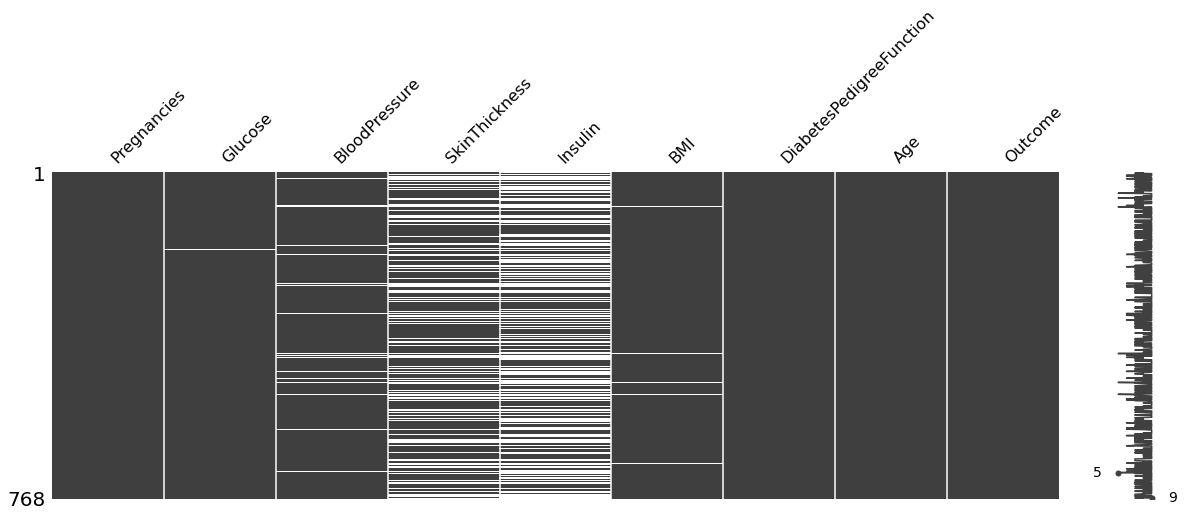

In [9]:
#Visualizing the missing values

mno.matrix(data_copy, figsize = (20, 6))

In [10]:
#Percentage of NaNs in each column

round(data_copy.isnull().sum()/len(data_copy)*100,2)

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [11]:
#For easy access, renaming data_copy as df
df=data_copy

### Distribution Plots

In [12]:
# set the background style of the plot
sns.set_style('whitegrid')

<AxesSubplot:xlabel='BMI', ylabel='Density'>

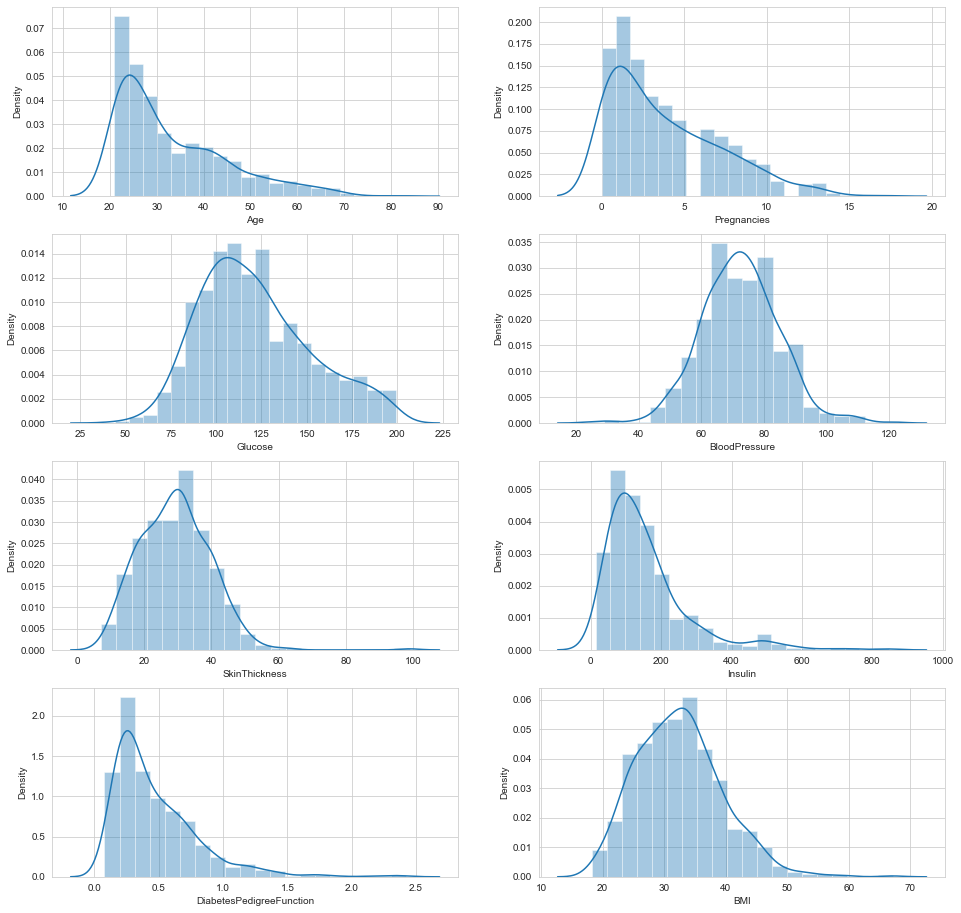

In [13]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

We can say the data is skewed to the right if mean is grater than the median value and vice versa. Such situation is significantly observed for Insulin. The data also seems to have some outliers which can be viewed using boxplot.

The plots show that Glucose, Blood Pressure, BMI are normally distributed. Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.
The missing values can either be imputed with mean or median or any value or they can be deleted from the dataset for further analysis. Here, we are trying to replace them with mean and median values according to their distribution.

In [14]:
#Checking the skewness of data

df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skewed values we'll impute the column with median else mean.

Glucose, BloodPressure, SkinThickness, Insulin, BMI are the columns with missing values.

In [15]:
# Highly skewed
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

#Normal
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


 Missing values have been handled.

### Checking for duplicate values

In [17]:
df.duplicated().sum()

0

There are no duplicate values in the data

### Encoding Categorical Variables

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There are no categorical variables in the data except the target variable which is Outcome. 
It has the values 0 and 1 which represent if a patient is non-diabetic or diabetic.

### Outliers

[Text(0.5, 1.0, 'Box Plot of Pregnancies wrt Outcome')]

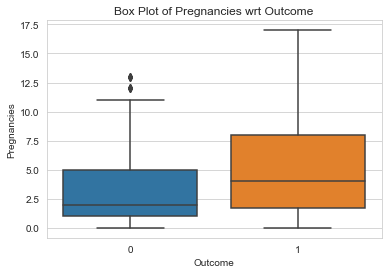

In [19]:
#box plot to visualize the outliers

sns.set_style("whitegrid")
  
sns.boxplot(y = 'Pregnancies', x = 'Outcome', data = df).set(title="Box Plot of Pregnancies wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Glucose wrt Outcome')]

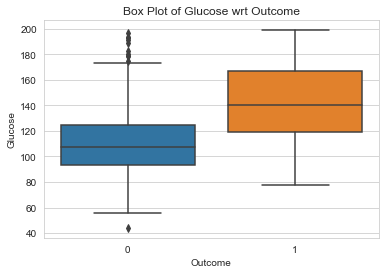

In [20]:
sns.boxplot(y = 'Glucose', x = 'Outcome', data = df).set(title="Box Plot of Glucose wrt Outcome")

In [21]:
print(np.where(df['Glucose']>180))

(array([  2,   8,  13,  22,  56, 154, 185, 186, 206, 209, 228, 236, 245,
       258, 260, 317, 319, 359, 360, 399, 408, 425, 427, 440, 489, 498,
       545, 546, 549, 561, 579, 595, 604, 606, 622, 661, 675, 715, 748,
       753, 759], dtype=int64),)


[Text(0.5, 1.0, 'Box Plot of BloodPressure wrt Outcome')]

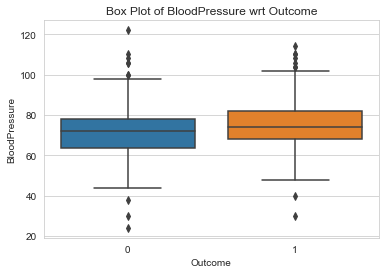

In [22]:
sns.boxplot(y = 'BloodPressure', x = 'Outcome', data = df).set(title="Box Plot of BloodPressure wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of SkinThickness wrt Outcome')]

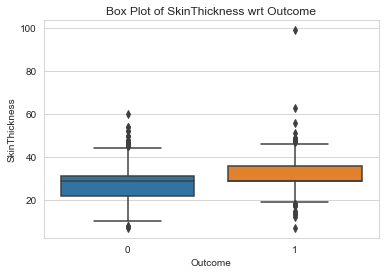

In [23]:
sns.boxplot(y = 'SkinThickness', x = 'Outcome', data = df).set(title="Box Plot of SkinThickness wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Insulin wrt Outcome')]

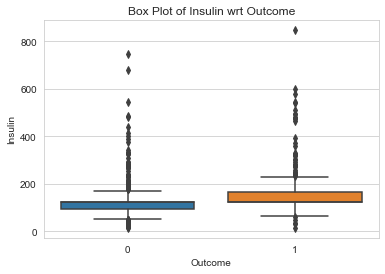

In [24]:
sns.boxplot(y = 'SkinThickness', x = 'Outcome', data = df).set(title="Box Plot of SkinThickness wrt Outcome")

There seeem to be many outliers in Insulin column

[Text(0.5, 1.0, 'Box Plot of DiabetesPedigreeFunction wrt Outcome')]

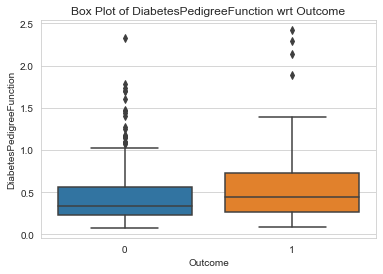

In [25]:
sns.boxplot(y = 'DiabetesPedigreeFunction', x = 'Outcome', data = df).set(title="Box Plot of DiabetesPedigreeFunction wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Age wrt Outcome')]

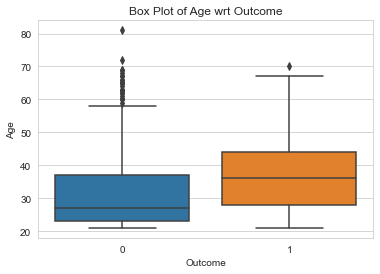

In [26]:
sns.boxplot(y = 'Age', x = 'Outcome', data = df).set(title="Box Plot of Age wrt Outcome")

### Handling Outliers

####  Z-Score

Z-Score describes any data point by finding their relationship between mean and standard deviation of the group of data points. 

It finds the distribution of data where mean is 0 and standard deviation is 1. While calculating Z-score we will re-scale and center the data and look for data points too far from 0, these are the outliers. 

Here, I have used a threshold of 3 or -3 (which is true in most cases), that is if Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outlier.

In [27]:
from scipy import stats
z=np.abs(stats.zscore(df))

z_df = df[(z < 3).all(axis=1)]

In [28]:
print(f'Before: {df.shape}, After: {z_df.shape}')

Before: (768, 9), After: (718, 9)


In [29]:
z_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,718.0,3.834262,3.275640,0.000,1.0000,3.000,6.0,13.000
Glucose,718.0,120.042387,29.662512,44.000,99.0000,115.000,138.0,199.000
BloodPressure,718.0,72.293560,11.334689,38.000,64.0000,72.000,80.0,108.000
SkinThickness,718.0,28.715877,8.157108,7.000,25.0000,29.000,32.0,54.000
Insulin,718.0,130.305014,55.569327,15.000,120.0000,125.000,125.0,392.000
BMI,718.0,32.132730,6.478313,18.200,27.4000,32.050,36.1,52.900
DiabetesPedigreeFunction,718.0,0.449453,0.282918,0.078,0.2415,0.363,0.6,1.461
Age,718.0,32.920613,11.317435,21.000,24.0000,29.000,40.0,68.000
Outcome,718.0,0.337047,0.473031,0.000,0.0000,0.000,1.0,1.000


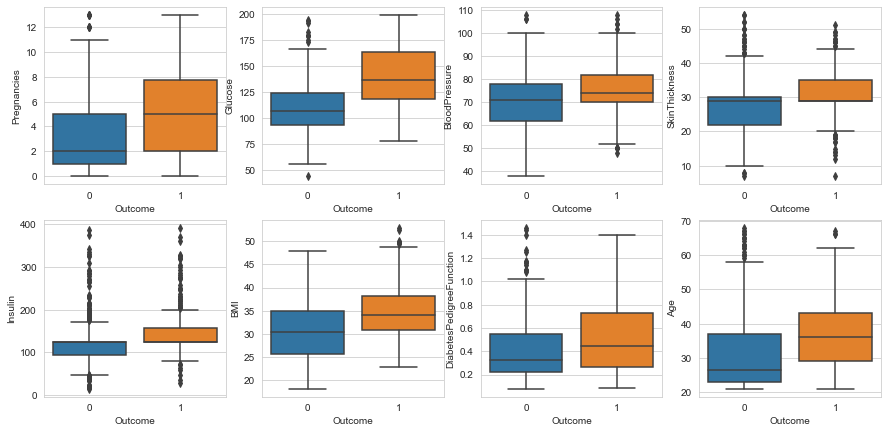

In [30]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=z_df.Outcome,y = col, data = z_df)
plt.show()


 After doing the Z-score method, I still found outliers, so I decided to use IQR score method to remove them.

####  IQR Score

IQR score is the difference between 75th and 25th percentiles that is upper and lower quartile.

In [31]:
Q1=z_df.quantile(0.25)
Q3=z_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     39.0000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                      5.0000
BMI                          8.7000
DiabetesPedigreeFunction     0.3585
Age                         16.0000
Outcome                      1.0000
dtype: float64


In [32]:
iqr_df = z_df[~((z_df < (Q1 - 1.5 * IQR)) | (z_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
print(f'Before: {df.shape}, After: {iqr_df.shape}')

Before: (768, 9), After: (358, 9)


Almost half of the data is lost after removing outliers using this method.

As we have observed above through boxplots, Insulin has many outliers. We will check the correlation of this column to check the importance of it with the target variable Outcome.

Pandas dataframe.corrwith() is used to compute pairwise correlation between rows or columns of two DataFrame objects. If the shape of two dataframe object is not same then the corresponding correlation value will be a NaN value.

The Result of the correlation represents how well the relationship is between two columns.

- The number varies from -1 to 1.

- 1 means that there is a 1 to 1 relationship (a perfect correlation) which usually exists from a column to itself.

- 0.9 means that good relationship exists, and with increase in one value, the other will probably increase as well.

- -0.9 would be just as good relationship as 0.9, but with the increase in one value, the other will probably go down.

- 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

In [34]:
df.corrwith(df['Outcome'],axis = 0).sort_values(ascending=True)

BloodPressure               0.166074
DiabetesPedigreeFunction    0.173844
Insulin                     0.203790
SkinThickness               0.214873
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312038
Glucose                     0.492928
Outcome                     1.000000
dtype: float64

Looks like Insulin is of not much importance to the outcome. Lets remove it from the data and remove outliers using IQR method.

In [35]:
new_df=z_df.drop(['Insulin'], axis=1)

In [36]:
Q1=new_df.quantile(0.25)
Q3=new_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     39.0000
BloodPressure               16.0000
SkinThickness                7.0000
BMI                          8.7000
DiabetesPedigreeFunction     0.3585
Age                         16.0000
Outcome                      1.0000
dtype: float64


In [37]:
iqr_df_2 = new_df[~((z_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
print(f'Before: {df.shape}, After: {iqr_df_2.shape}')

Before: (768, 9), After: (599, 8)


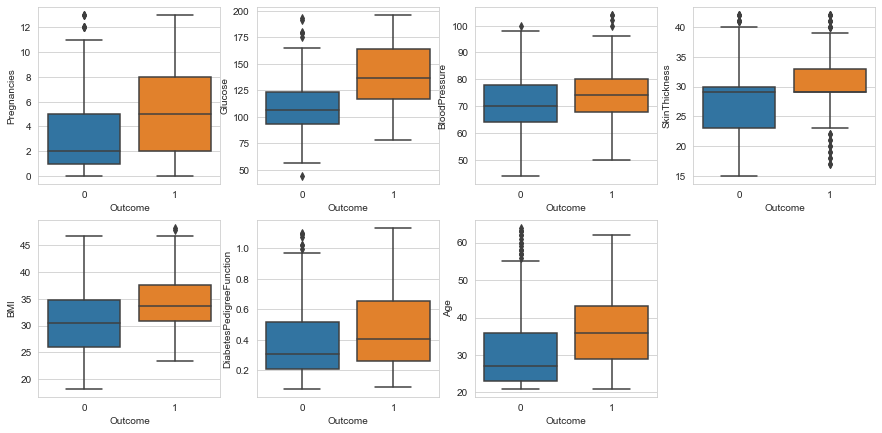

In [39]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=iqr_df_2.Outcome,y = col, data = iqr_df_2)
plt.show()

####  QuantileTransformer

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [40]:
from sklearn.preprocessing import QuantileTransformer

quantile  = QuantileTransformer()

q = quantile.fit_transform(df)
qt_df=quantile.transform(q)

qt_df=pd.DataFrame(q)
qt_df.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [41]:
qt_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.471317,0.801825,0.498696,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.496741,0.498696,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.496741,0.498696,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.209909,0.175359,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [42]:
print(f'Before: {df.shape}, After: {qt_df.shape}')

Before: (768, 9), After: (768, 9)


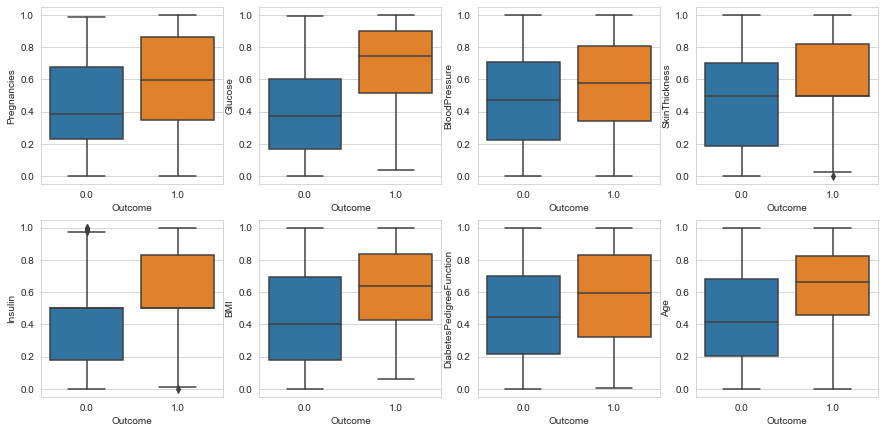

In [43]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=qt_df.Outcome,y = col, data = qt_df)
plt.show()

If this method is used to handle outliers, we don't have to remove any columns as it handles most of them.

### Viewing the target variable

In [44]:
print("Number of samples for Outcome 0 are : ",len(data_copy[data_copy['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(data_copy[data_copy['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


<AxesSubplot:xlabel='Outcome', ylabel='count'>

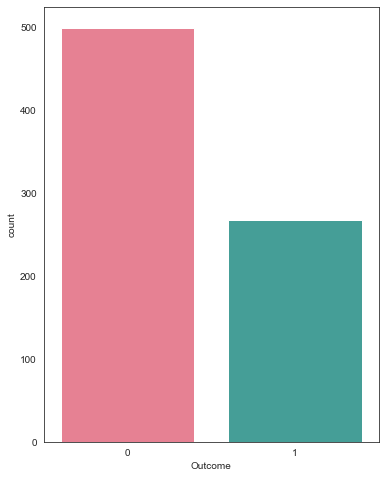

In [45]:
plt.figure(figsize=(6,8))
sns.set_style(style='white')
sns.countplot(data_copy['Outcome'],palette="husl")

The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.

#### Classes are imbalanced. The Data is biased towards people who are non-diabetics

### Feature Importance

In [46]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=qt_df[qt_df.columns[:8]]
Y=qt_df['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.249936
BMI                         0.167015
Age                         0.136222
DiabetesPedigreeFunction    0.116371
Insulin                     0.089548
BloodPressure               0.084363
Pregnancies                 0.082248
SkinThickness               0.074297
dtype: float64

It looks like the variables Glucose, BMI, Age, DiabetesPedigreeFunction are the important columns for analysis. But lets check the accuracy of the model to decide what to do with other variables.

### Dividing the data into independent features(X) and target feature(y).

In [47]:
X = qt_df.drop(columns = ['Outcome'])
y = qt_df['Outcome']

In [48]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Standard Scaler: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

In [49]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling Class Imbalance Problem using Over Sampling

In [50]:
y.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

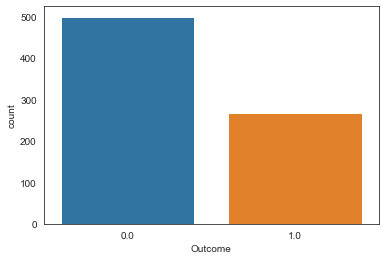

In [51]:
sns.countplot(y)

A huge imbalance can be observed in the Outcome values. To overcome this problem, we use the SMOTE technique.


Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. Remember it is always done on the Training Data and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.

The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [56]:
#!pip install imblearn

In [57]:
# checking the version 
import imblearn
print(imblearn.__version__)

0.9.0


In [58]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([393, 393], dtype=int64)

It is balanced now.